#  Level of Carbon monoxide (CO) prediction in Gas-Turbines

The main objective of this notebbok is to use data to create a model that predict the Carbon monoxide emitted by gas-turbines used in power generation plants. 

The dataset was obtained from kaggle in the folowing link:https://www.kaggle.com/datasets/muniryadi/gasturbine-co-and-nox-emission-data 

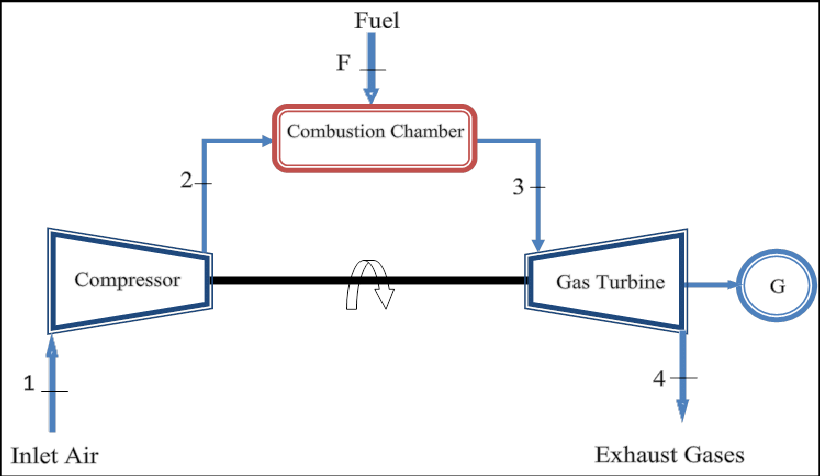

## EDA

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [49]:
raw_data = pd.read_csv('../data/gt_full.csv')

In [50]:
raw_data.head()

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


### Deleting "Unnamend:0" column:

In [51]:
raw_data.drop(columns = ['Unnamed: 0'], inplace = True)

In [52]:
raw_data.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738
36732,6.0392,1028.8,94.547,3.8752,22.524,1067.9,548.23,125.41,11.462,11.9810,109.240


### Changing the columns names:

<ul>
    <li>AT = Ambient temperature [°C]</li>
    <li>AP = Ambient pressure [mbar]</li>
    <li>AH = Ambient humidity [%]</li>
    <li>AFDP = Air filter difference pressure [mbar]</li>
    <li>GTEP = Gas turbine exhaust pressure [mbar]</li>
    <li>TIT = Turbine inlet temperature [°C]</li>
    <li>TAT = Turbine after temperature [°C]</li>
    <li>TEY = Turbine energy yield [MWh]</li>
    <li>CDP = Compressor discharge pressure [bar]</li>
    <li>CO = Carbon monoxide [mg/m³]</li>
    <li>NOx = Nitrogen oxides [mg/m³]</li>
</ul>


In [74]:
new_names = {
    'AT': 'air_temp',
    'AP': 'air_press',
    'AH': 'air_hum',
    'AFDP': 'air_filt_dp',
    'CDP': 'comp_out_press',
    'TIT': 'turb_in_temp',
    'TAT': 'turb_out_temp',
    'GTEP': 'turb_out_press',
    'TEY': 'turb_energy',
    'NOX': 'NOx'
}

In [75]:
raw_data.rename(columns = new_names, inplace = True)

### Transforming CDP unity to mbar

In [107]:
raw_data['comp_out_press'] = raw_data['comp_out_press']*1000 

In [110]:
raw_data.head()

,air_temp,air_press,air_hum,air_filt_dp,turb_out_press,turb_in_temp,turb_out_temp,turb_energy,comp_out_press,CO,NOx
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11898.0,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11892.0,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12042.0,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11990.0,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11910.0,0.26747,82.028


### Getting dataset info

In [111]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   air_temp        36733 non-null  float64
 1   air_press       36733 non-null  float64
 2   air_hum         36733 non-null  float64
 3   air_filt_dp     36733 non-null  float64
 4   turb_out_press  36733 non-null  float64
 5   turb_in_temp    36733 non-null  float64
 6   turb_out_temp   36733 non-null  float64
 7   turb_energy     36733 non-null  float64
 8   comp_out_press  36733 non-null  float64
 9   CO              36733 non-null  float64
 10  NOx             36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


<AxesSubplot:>

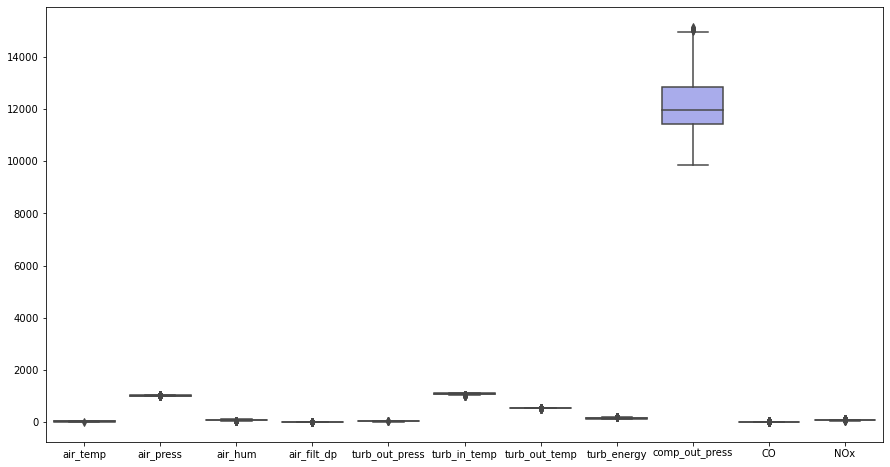

In [112]:
plt.figure(figsize = (15,8))
sns.boxplot(data = raw_data)

In [113]:
raw_data.describe().round(3)

,air_temp,air_press,air_hum,air_filt_dp,turb_out_press,turb_in_temp,turb_out_temp,turb_energy,comp_out_press,CO,NOx
count,36733.000,36733.000,36733.000,36733.000,36733.000,36733.000,36733.000,36733.000,36733.000,36733.000,36733.000
mean,17.713,1013.070,77.867,3.926,25.564,1081.428,546.159,133.506,12060.525,2.372,65.293
std,7.447,6.463,14.461,0.774,4.196,17.536,6.842,15.619,1088.795,2.263,11.678
min,-6.235,985.850,24.085,2.087,17.698,1000.800,511.040,100.020,9851.800,0.000,25.905
25%,11.781,1008.800,68.188,3.356,23.129,1071.800,544.720,124.450,11435.000,1.182,57.162
50%,17.801,1012.600,80.470,3.938,25.104,1085.900,549.880,133.730,11965.000,1.714,63.849
75%,23.665,1017.000,89.376,4.377,29.061,1097.000,550.040,144.080,12855.000,2.843,71.548
max,37.103,1036.600,100.200,7.611,40.716,1100.900,550.610,179.500,15159.000,44.103,119.910


### Correlation

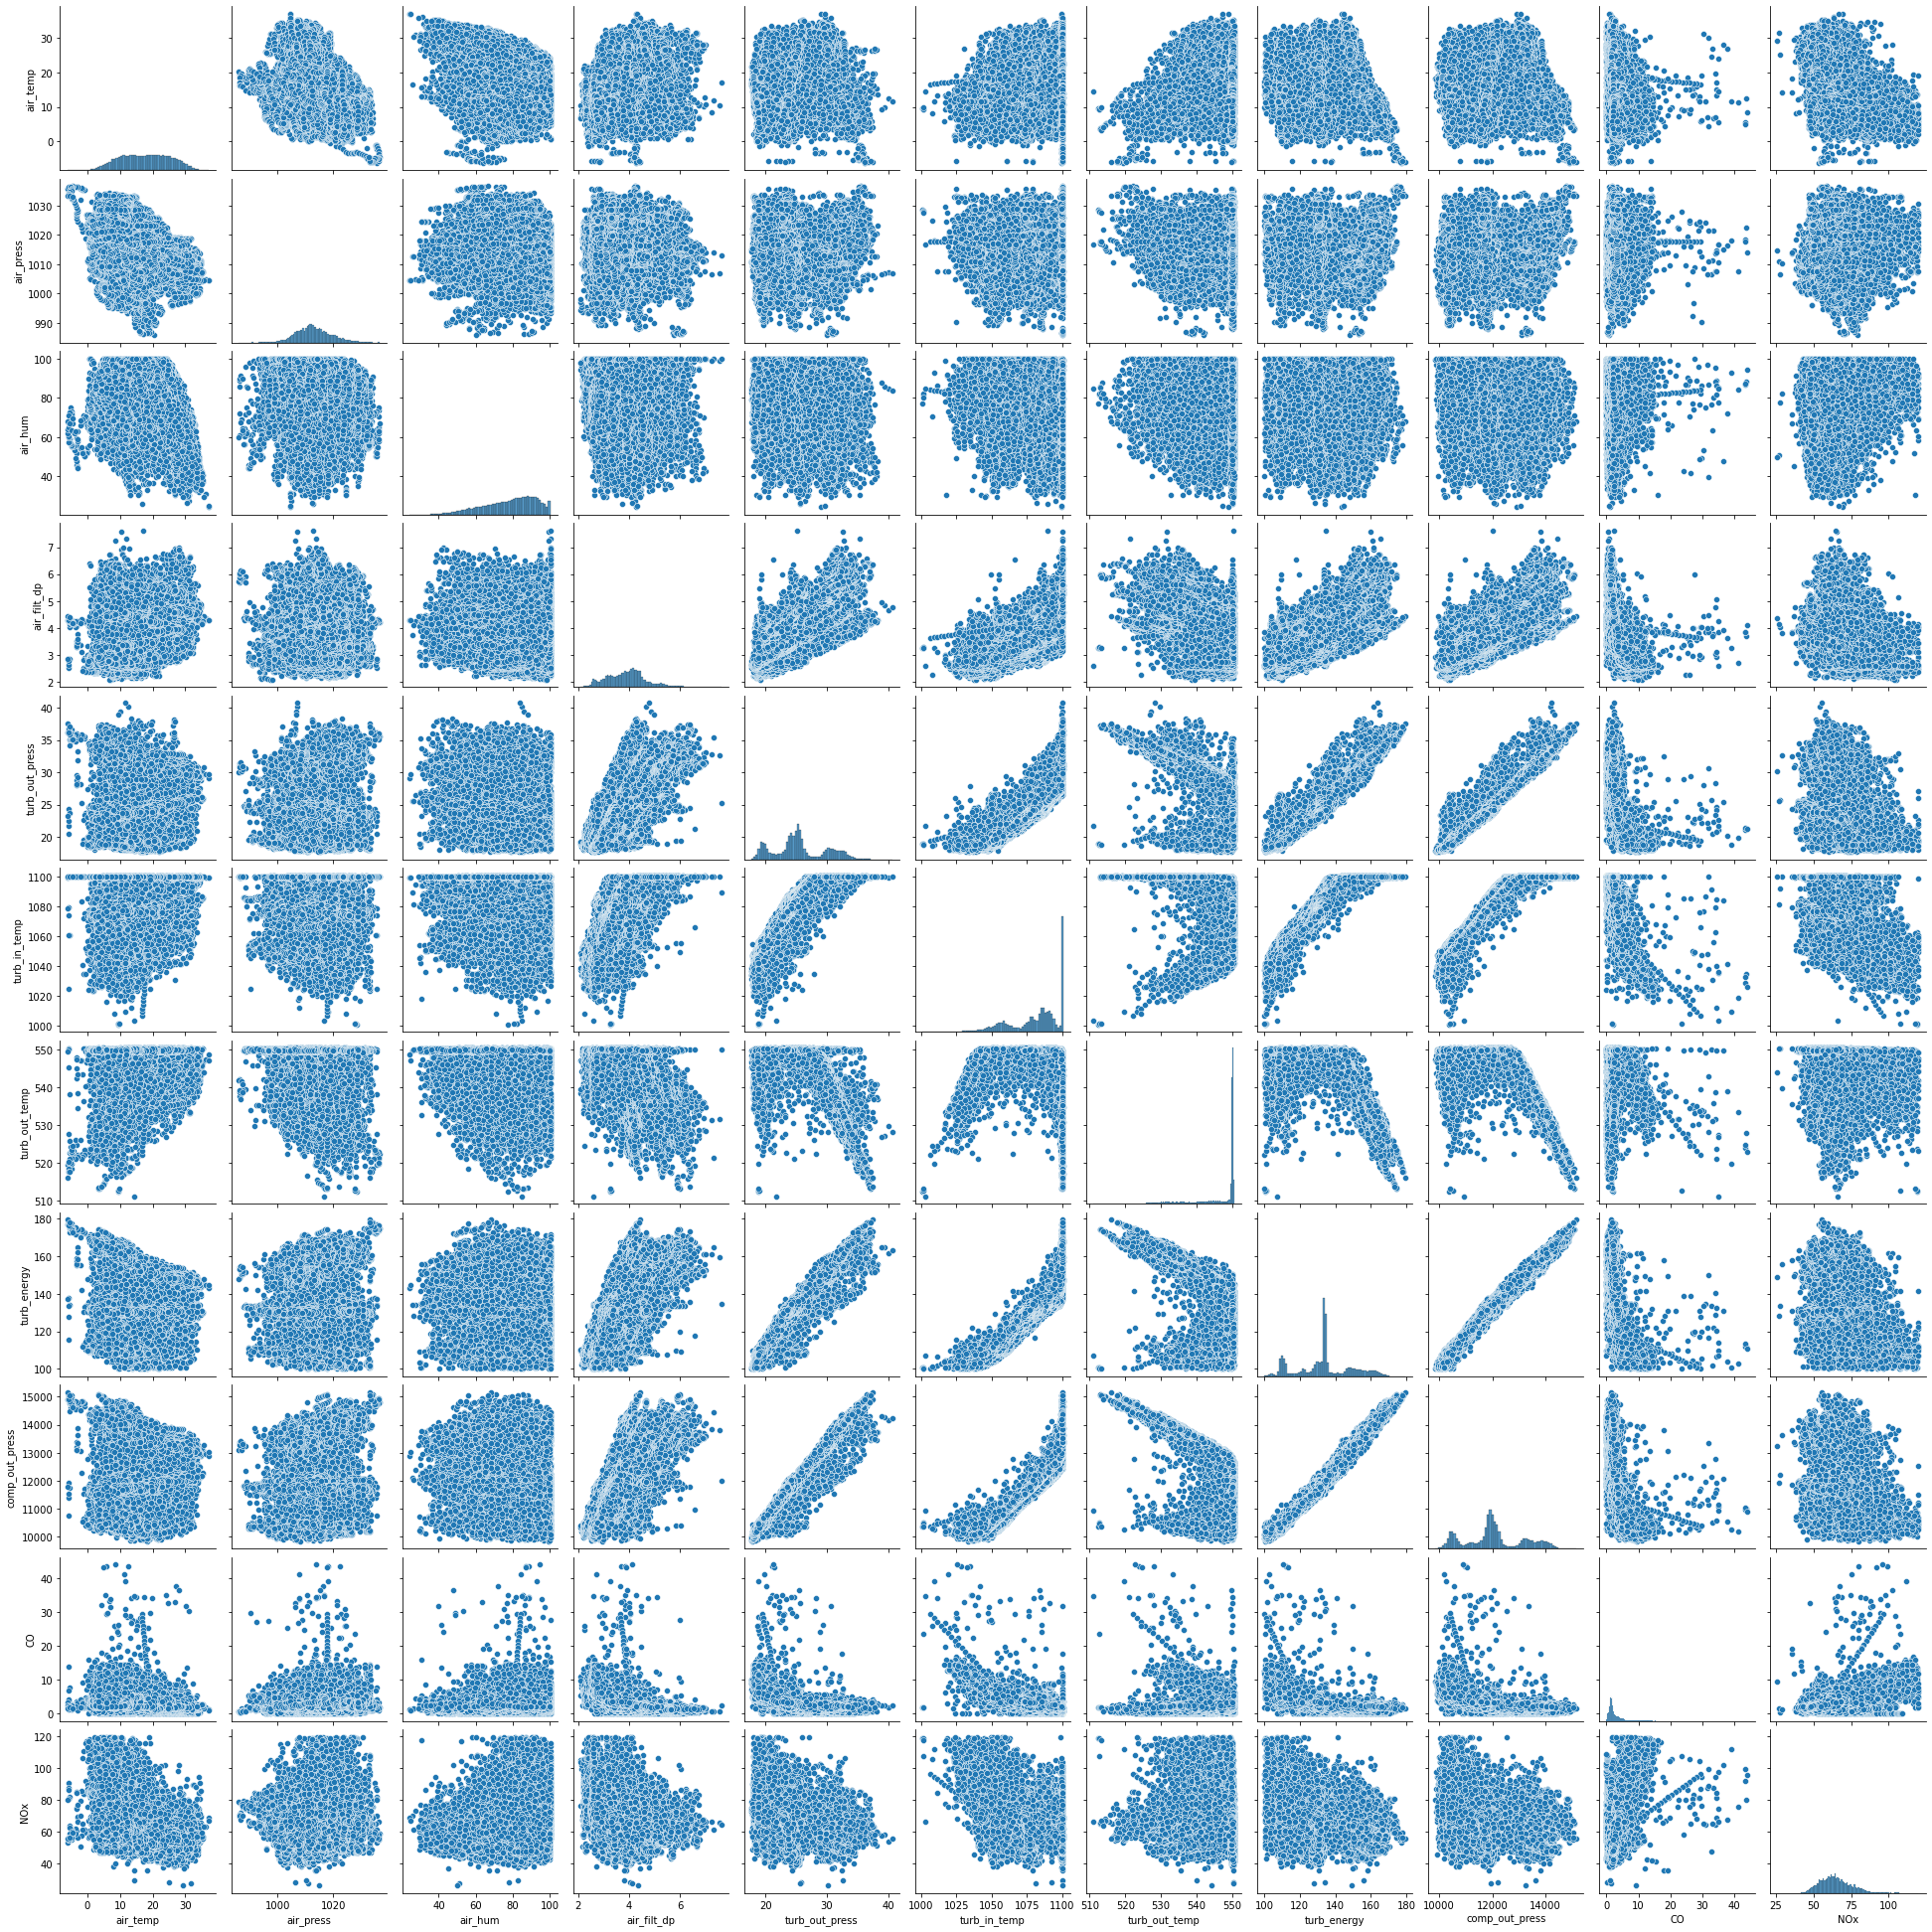

In [126]:
sns.pairplot(raw_data)

In [127]:
raw_data.corr(method = 'spearman')

,air_temp,air_press,air_hum,air_filt_dp,turb_out_press,turb_in_temp,turb_out_temp,turb_energy,comp_out_press,CO,NOx
air_temp,1.000000,-0.409745,-0.449261,0.296912,0.155155,0.179090,0.187189,-0.056762,0.130098,-0.114026,-0.580365
air_press,-0.409745,1.000000,-0.030536,-0.065317,-0.011111,0.001887,-0.142621,0.077198,0.041977,0.033200,0.194497
air_hum,-0.449261,-0.030536,1.000000,-0.165727,-0.280650,-0.245424,0.053827,-0.142756,-0.249985,0.080805,0.149635
air_filt_dp,0.296912,-0.065317,-0.165727,1.000000,0.695574,0.741554,-0.344083,0.655322,0.725839,-0.536206,-0.140450
turb_out_press,0.155155,-0.011111,-0.280650,0.695574,1.000000,0.926302,-0.481673,0.920913,0.968387,-0.639133,-0.154089
turb_in_temp,0.179090,0.001887,-0.245424,0.741554,0.926302,1.000000,-0.449658,0.929037,0.962972,-0.698435,-0.078099
turb_out_temp,0.187189,-0.142621,0.053827,-0.344083,-0.481673,-0.449658,1.000000,-0.499017,-0.490502,0.183890,-0.084772
turb_energy,-0.056762,0.077198,-0.142756,0.655322,0.920913,0.929037,-0.499017,1.000000,0.950212,-0.671618,-0.003652
comp_out_press,0.130098,0.041977,-0.249985,0.725839,0.968387,0.962972,-0.490502,0.950212,1.000000,-0.675231,-0.108101
CO,-0.114026,0.033200,0.080805,-0.536206,-0.639133,-0.698435,0.183890,-0.671618,-0.675231,1.000000,0.056842


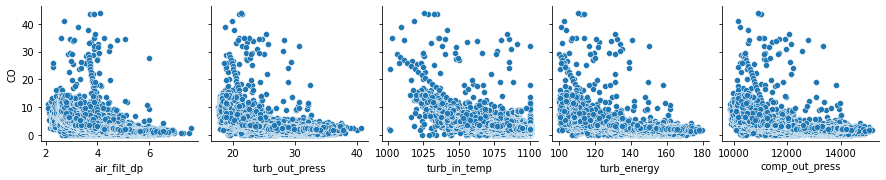

In [115]:
sns.pairplot(raw_data, y_vars = ['CO'], 
             x_vars = ['air_filt_dp', 'turb_out_press', 'turb_in_temp', 'turb_energy', 'comp_out_press'])

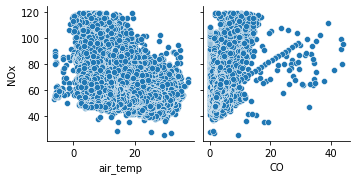

In [116]:
sns.pairplot(raw_data, y_vars = ['NOx'], 
             x_vars = ['air_temp', 'CO'])

### Observations:

CO emmission strong correlation:
<ul>
    <li>Air filter difference pressure;</li>
    <li>Turbine outlet pressure;</li>
    <li>Turbine inlet temperature;</li>
    <li>Turbine energy yeld;</li>
    <li>Compressor outlet pressure;</li>
</ul>

NOx emmission strong correlation:
<ul>
    <li>Air temperature;</li>
    <li>CO emmission;</li>
</ul>

### Feature selection

In [84]:
data = raw_data[['air_filt_dp', 'turb_out_press', 'turb_in_temp', 'turb_energy', 'comp_out_press', 'CO', 'NOx']]